In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv("data.csv")

In [30]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [31]:
df.shape

(500000, 26)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.columns.tolist()

['User ID',
 'User Name',
 'Driver Name',
 'Car Condition',
 'Weather',
 'Traffic Condition',
 'key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'hour',
 'day',
 'month',
 'weekday',
 'year',
 'jfk_dist',
 'ewr_dist',
 'lga_dist',
 'sol_dist',
 'nyc_dist',
 'distance',
 'bearing']

In [35]:
drop_cols = ['User ID', 'User Name', 'Driver Name', 'key']
df.drop(columns=drop_cols, inplace=True)

In [36]:
df.dropna(inplace=True)
df.shape

(499995, 22)

In [37]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, ['fare_amount', 'distance', 'passenger_count'])

In [38]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [39]:
df = pd.get_dummies(df, columns=['Car Condition', 'Weather', 'Traffic Condition'], drop_first=True)

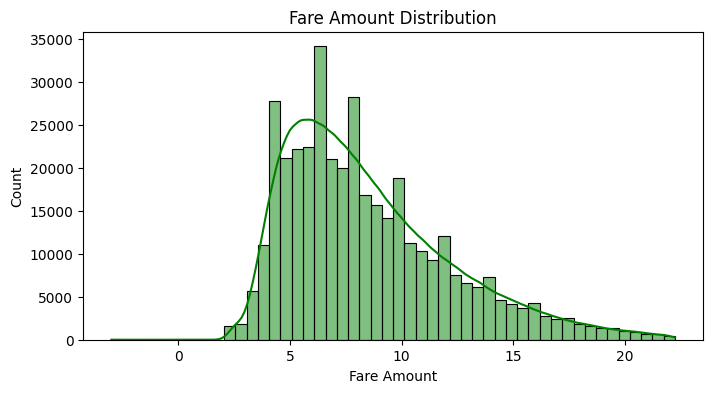

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(df['fare_amount'], kde=True, bins=50, color='green')
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount")
plt.show()

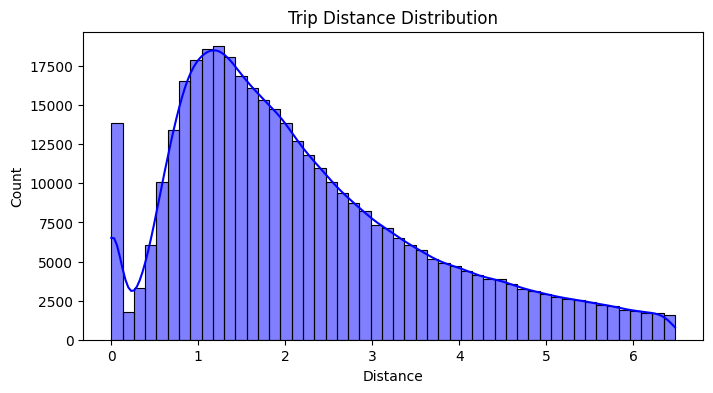

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(df['distance'], kde=True, bins=50, color='blue')
plt.title("Trip Distance Distribution")
plt.xlabel("Distance")
plt.show()

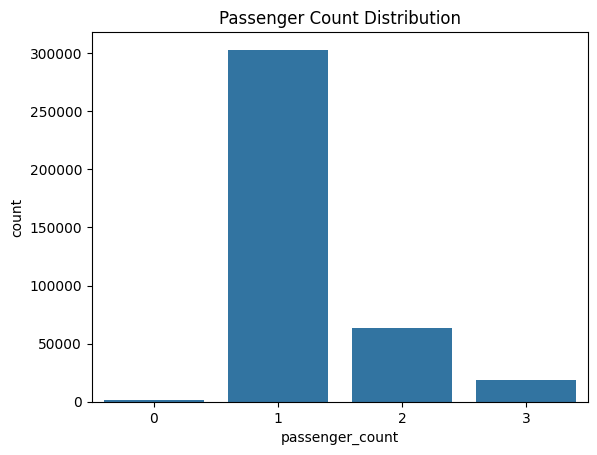

In [42]:
sns.countplot(x='passenger_count', data=df)
plt.title("Passenger Count Distribution")
plt.show()

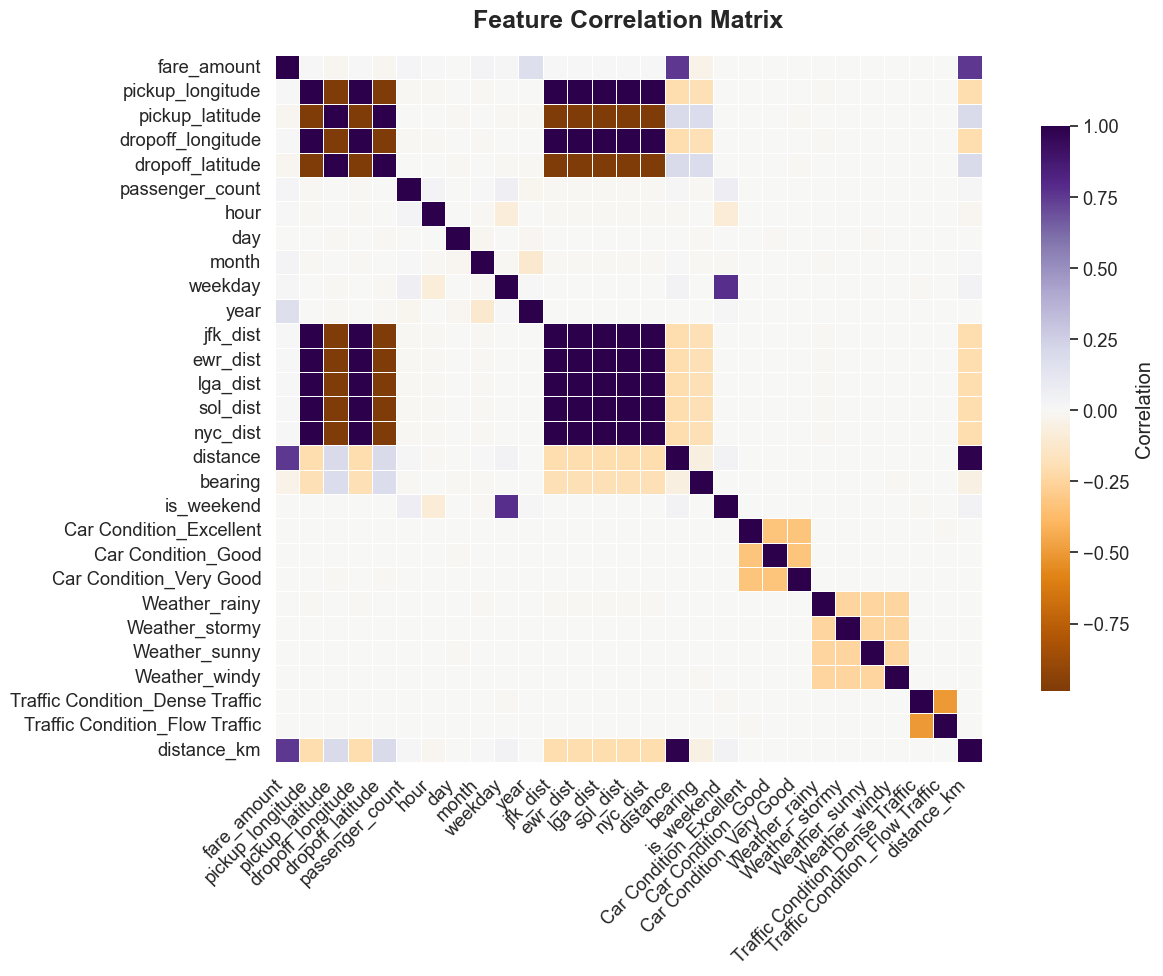

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
# mask = abs(corr) < 0.3

sns.set(font_scale=1.2) 
sns.set_style("white")  

heatmap = sns.heatmap(
    corr,
    # annot=True,        
    fmt=".2f",
    cmap="PuOr",  
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title("Feature Correlation Matrix", fontsize=18, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
sample_df = df.sample(50)
heat_data = sample_df[['pickup_latitude', 'pickup_longitude']].values.tolist()

In [45]:
from geopy.distance import geodesic

df['distance_km'] = df.apply(lambda row: geodesic(
    (row['pickup_latitude'], row['pickup_longitude']),
    (row['dropoff_latitude'], row['dropoff_longitude'])
).km, axis=1)

In [46]:
import numpy as np

def calculate_bearing(lat1, lon1, lat2, lon2):
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)

    x = np.sin(dLon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - \
        np.sin(lat1) * np.cos(lat2) * np.cos(dLon)
    bearing = np.arctan2(x, y)
    return (np.degrees(bearing) + 360) % 360

df['bearing'] = df.apply(lambda row: calculate_bearing(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']
), axis=1)


In [47]:
df["bearing"]

0         163.367686
2         218.453490
3         349.916552
4          35.983729
5          46.536838
             ...    
499989    234.483263
499991    336.058971
499995    122.801541
499996    221.122754
499999    155.831219
Name: bearing, Length: 387250, dtype: float64

In [48]:
def direction_from_bearing(bearing):
    directions = ['North', 'North-East', 'East', 'South-East', 
                  'South', 'South-West', 'West', 'North-West']
    idx = int((bearing + 22.5) // 45) % 8
    return directions[idx]

df['direction'] = df['bearing'].apply(direction_from_bearing)


In [49]:
df['direction']

0              South
2         South-West
3              North
4         North-East
5         North-East
             ...    
499989    South-West
499991    North-West
499995    South-East
499996    South-West
499999    South-East
Name: direction, Length: 387250, dtype: object

C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_37896\1019617515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='direction', order=['North', 'North-East', 'East', 'South-East',


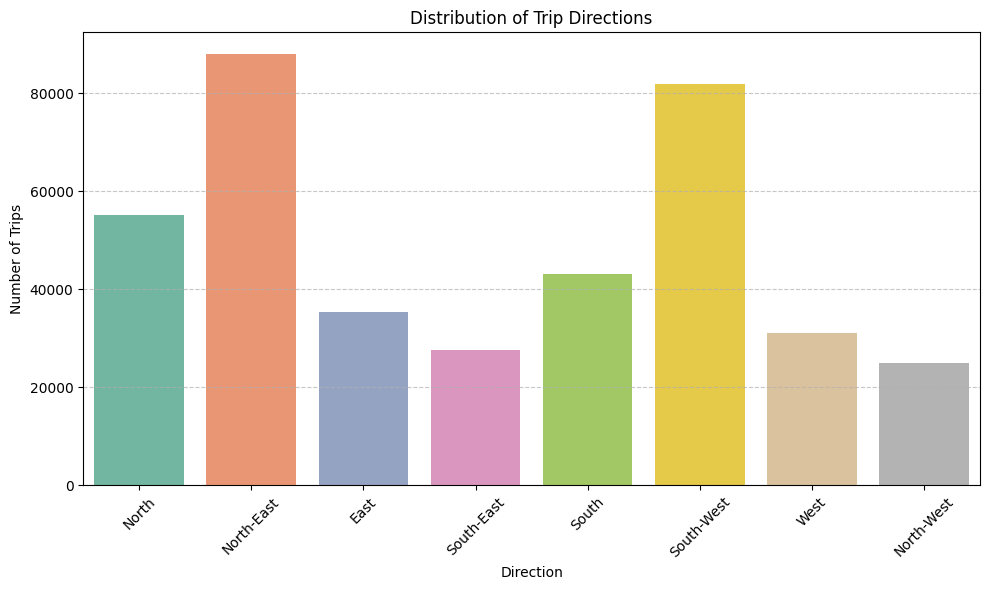

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='direction', order=['North', 'North-East', 'East', 'South-East',
                                             'South', 'South-West', 'West', 'North-West'], palette='Set2')

plt.title('Distribution of Trip Directions')
plt.xlabel('Direction')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_37896\2850481857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='direction', y='fare_amount',


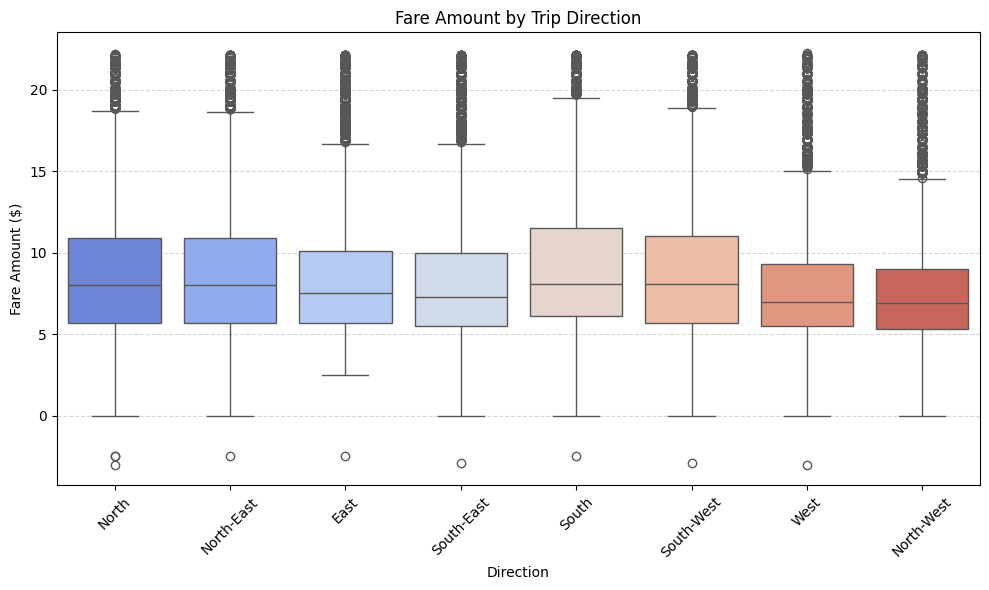

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='direction', y='fare_amount', 
            order=['North', 'North-East', 'East', 'South-East',
                   'South', 'South-West', 'West', 'North-West'], palette='coolwarm')

plt.title('Fare Amount by Trip Direction')
plt.xlabel('Direction')
plt.ylabel('Fare Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [52]:
from geopy.distance import geodesic

df['distance_km'] = df.apply(lambda row: geodesic(
    (row['pickup_latitude'], row['pickup_longitude']),
    (row['dropoff_latitude'], row['dropoff_longitude'])
).km, axis=1)


C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_37896\804733757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='direction', y='distance_km',


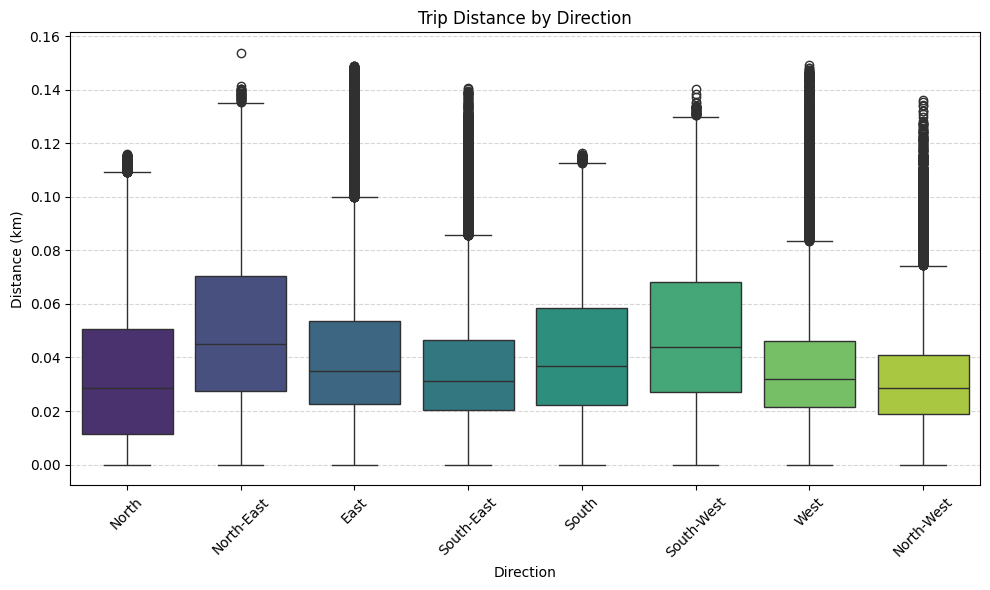

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='direction', y='distance_km', 
            order=['North', 'North-East', 'East', 'South-East',
                   'South', 'South-West', 'West', 'North-West'], palette='viridis')

plt.title('Trip Distance by Direction')
plt.xlabel('Direction')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


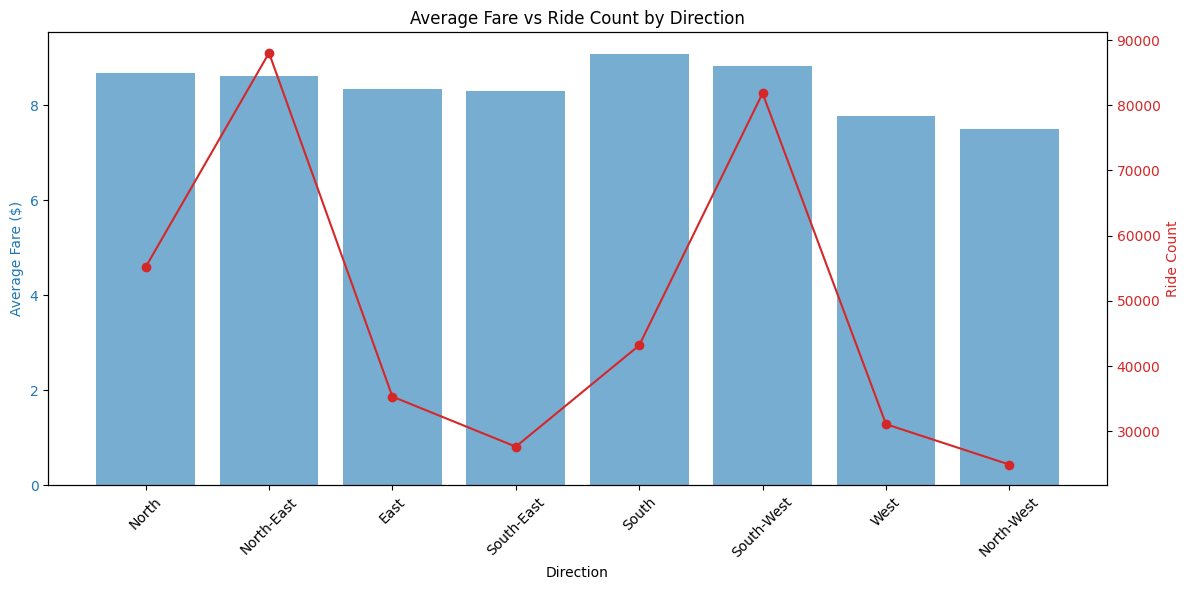

In [54]:
grouped = df.groupby('direction').agg({
    'fare_amount': 'mean',
    'distance_km': 'mean',
    'direction': 'count'
}).rename(columns={'direction': 'ride_count'})

grouped = grouped.reindex(['North', 'North-East', 'East', 'South-East',
                           'South', 'South-West', 'West', 'North-West'])

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Direction')
ax1.set_ylabel('Average Fare ($)', color=color)
ax1.bar(grouped.index, grouped['fare_amount'], color=color, alpha=0.6, label='Avg Fare')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

ax2 = ax1.twinx()  # second y-axis
color = 'tab:red'
ax2.set_ylabel('Ride Count', color=color)
ax2.plot(grouped.index, grouped['ride_count'], color=color, marker='o', label='Ride Count')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Fare vs Ride Count by Direction')
plt.grid(axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()


In [ ]:

airport_columns = ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']
existing_columns = [col for col in airport_columns if col in df.columns]

if existing_columns:
    print(f"airport distance columns: {existing_columns}")
    
    # proximity by finding the min distance
    df['closest_airport_dist'] = df[existing_columns].min(axis=1)
    
    # proximity category (closest airport name)
    df['airport_proximity'] = df[existing_columns].idxmin(axis=1)
    
    # Clean up the airport names
    df['airport_proximity'] = df['airport_proximity'].str.replace('_dist', '').str.upper()

Found airport distance columns: ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist']
Created features:
- closest_airport_dist: Distance to the closest airport
- airport_proximity: Name of the closest airport

Airport proximity distribution:
airport_proximity
NYC    332202
LGA     46153
JFK      8316
SOL       471
EWR       108
Name: count, dtype: int64


C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_37896\902624484.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='airport_proximity', palette='Set1')
C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_37896\902624484.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='airport_proximity', y='fare_amount', palette='Set2')
C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_37896\902624484.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='airport_proximity', y='fare_amount', palette='Set2')


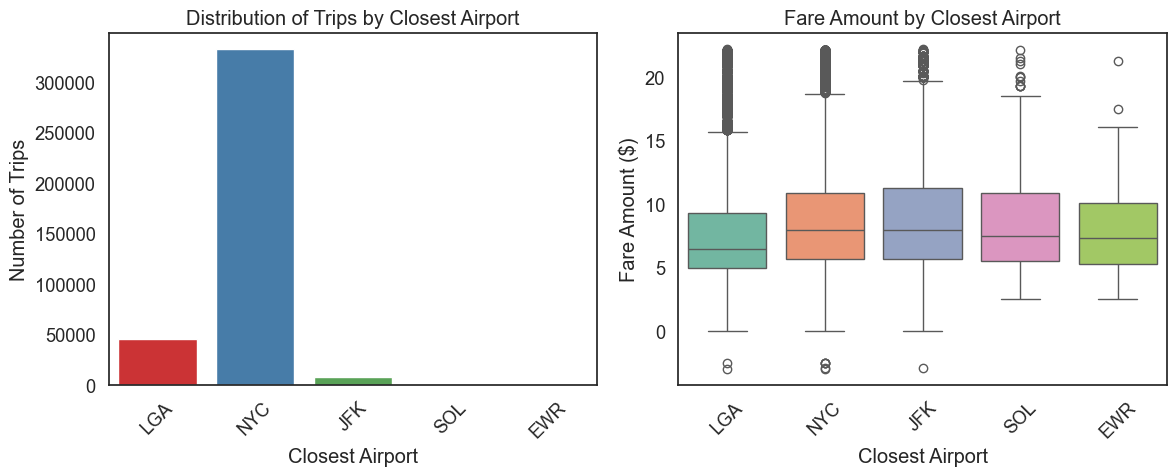


Average fare by closest airport:
                  fare_amount               closest_airport_dist
                         mean   std   count                 mean
airport_proximity                                               
EWR                      7.89  3.83     108               156.08
JFK                      8.85  4.33    8316             15830.77
LGA                      7.65  3.59   46153                14.71
NYC                      8.65  3.71  332202                 9.09
SOL                      8.47  3.95     471                14.65


In [ ]:
if 'airport_proximity' in df.columns:
    
    # Distribution of trips by closest airport
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x='airport_proximity', palette='Set1')
    plt.title('Distribution of Trips by Closest Airport')
    plt.xlabel('Closest Airport')
    plt.ylabel('Number of Trips')
    plt.xticks(rotation=45)
    
    # Fare amount by closest airport
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='airport_proximity', y='fare_amount', palette='Set2')
    plt.title('Fare Amount by Closest Airport')
    plt.xlabel('Closest Airport')
    plt.ylabel('Fare Amount ($)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

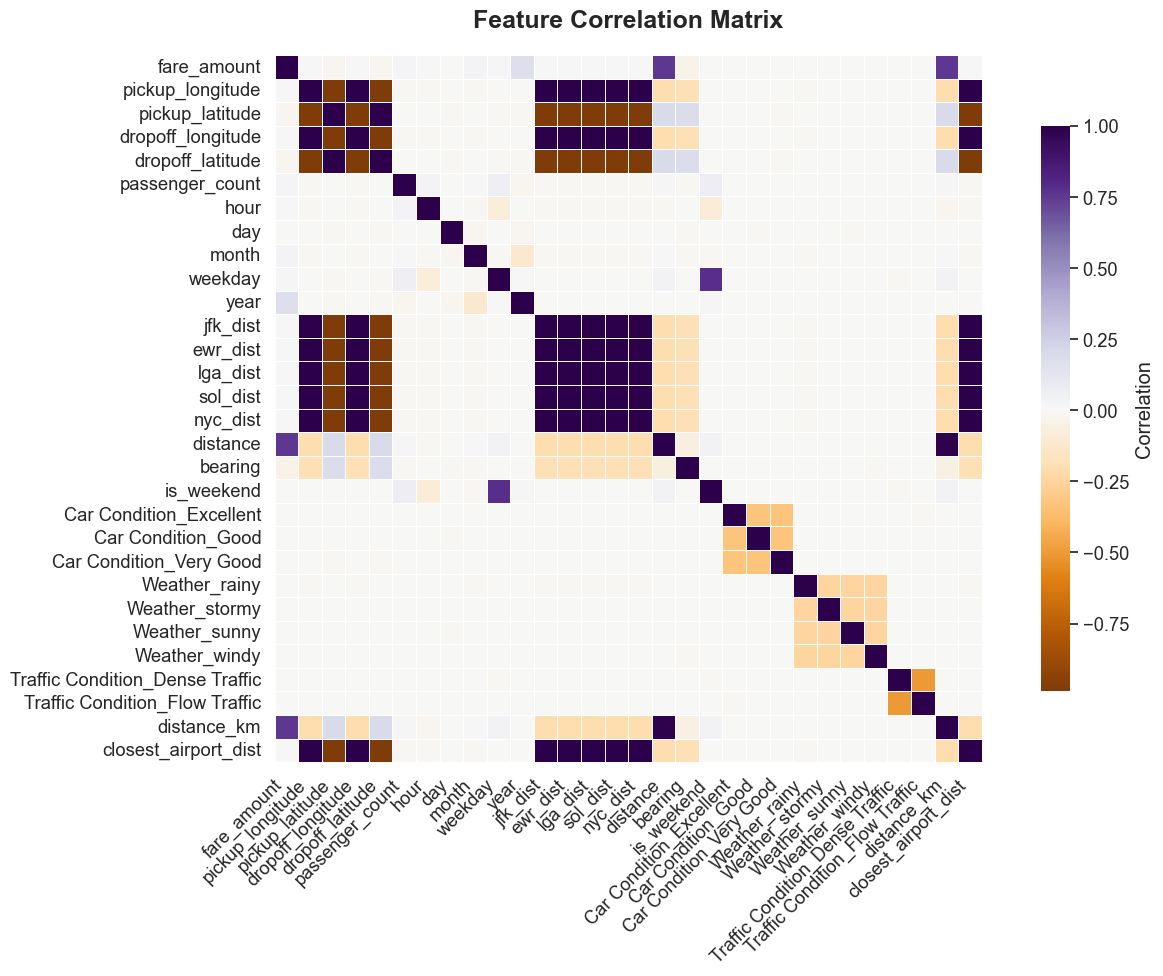

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
# mask = abs(corr) < 0.3

sns.set(font_scale=1.2) 
sns.set_style("white")  

heatmap = sns.heatmap(
    corr,
    # annot=True,        
    fmt=".2f",
    cmap="PuOr",  
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title("Feature Correlation Matrix", fontsize=18, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
